In [1]:
from sqlalchemy import create_engine, text
import pandas as pd
import numpy as np

db_conn = {
     "user": "root",
     "password": "Dhyoon96!",
     "host": "127.0.0.1",
     "database": "side_proj_FCO"
 }

db_engine = "mysql+pymysql://%s:%s@%s/%s" % (
    db_conn["user"],
    db_conn["password"],
    db_conn["host"],
    db_conn["database"]
)

engine = create_engine(db_engine, echo=True)

In [2]:
import matplotlib.pyplot as plt # pyplot
import matplotlib as mpl # matplotlib
%matplotlib inline

mpl.rc('font', family = 'Malgun Gothic') # 한글 설정 (맑은 고딕)
mpl.rc('axes', unicode_minus = False) # 음수 부호 깨지는거 설정

import seaborn as sns # seaborn
import scipy.stats as stats

In [3]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [5]:
df_query = 'SELECT * FROM match_user'
df1 = pd.read_sql(df_query, con = engine)

2024-12-01 00:29:09,179 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-12-01 00:29:09,180 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-01 00:29:09,181 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-12-01 00:29:09,182 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-01 00:29:09,184 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-12-01 00:29:09,184 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-01 00:29:09,187 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-12-01 00:29:09,187 INFO sqlalchemy.engine.Engine DESCRIBE `side_proj_fco`.`SELECT * FROM match_user`
2024-12-01 00:29:09,189 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-01 00:29:09,192 INFO sqlalchemy.engine.Engine SELECT * FROM match_user
2024-12-01 00:29:09,194 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-01 00:29:09,279 INFO sqlalchemy.engine.Engine ROLLBACK


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   match_id                          1509 non-null   object 
 1   user_ouid                         1509 non-null   object 
 2   user_nickname                     1509 non-null   object 
 3   match_result                      1509 non-null   object 
 4   match_possession                  1509 non-null   int64  
 5   match_avg_rating                  1509 non-null   float64
 6   match_total_dribble               1509 non-null   int64  
 7   match_total_pass_try              1509 non-null   int64  
 8   match_total_pass_suc              1509 non-null   int64  
 9   match_total_shoot                 1509 non-null   int64  
 10  match_total_shoot_eff             1509 non-null   int64  
 11  match_total_goal                  1509 non-null   int64  
 12  attack

In [7]:
df1.describe()

,match_possession,match_avg_rating,match_total_dribble,match_total_pass_try,match_total_pass_suc,match_total_shoot,match_total_shoot_eff,match_total_goal,attack_position_ratings,middle_position_ratings,...,match_total_pass_short_try,match_total_pass_short_suc,match_total_pass_long_try,match_total_pass_long_suc,match_total_pass_through_try,match_total_pass_through_suc,match_total_shoot_outpenalty_try,match_total_shoot_outpenalty_suc,match_total_shoot_inpenalty_try,match_total_shoot_inpenalty_suc
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,...,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,50.502319,3.855736,15.173625,20.915838,18.628231,2.181577,1.704440,0.991385,6.414268,6.713088,...,14.288270,13.469848,1.070908,0.567926,4.674619,3.984095,0.668655,0.196156,1.486415,0.776011
std,19.044400,0.509157,13.411675,18.428410,16.813110,3.241010,2.536495,1.638174,1.013354,1.153179,...,13.431909,12.795315,1.522905,1.060594,4.986935,4.459486,1.261112,0.511109,2.393483,1.411936
min,0.000000,2.788890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,3.450000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,5.700000,6.000000,...,4.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,3.811110,12.000000,17.000000,15.000000,1.000000,1.000000,0.000000,6.120000,6.200000,...,11.000000,10.000000,1.000000,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,4.200000,21.000000,29.000000,26.000000,3.000000,2.000000,2.000000,7.070000,7.300000,...,21.000000,20.000000,2.000000,1.000000,7.000000,6.000000,1.000000,0.000000,2.000000,1.000000
max,100.000000,6.644440,103.000000,131.000000,120.000000,32.000000,25.000000,18.000000,10.000000,10.000000,...,102.000000,94.000000,14.000000,11.000000,43.000000,39.000000,15.000000,6.000000,27.000000,17.000000


In [8]:
df1['match_result'].value_counts()

match_result
승    802
패    707
Name: count, dtype: int64

---

# 변수간 상관관계 및 VIF 확인

In [9]:
basic_col = ['match_possession', 
             'match_avg_rating', 
             'match_total_dribble', 
             'match_total_goal', 
             'match_total_shoot', 
             'match_total_pass_suc']

position_ratings_col = ['attack_position_ratings', 
                        'middle_position_ratings', 
                        'defense_position_ratings', 
                        'goalkeeper_position_ratings']

pass_col = ['match_total_pass_try', 
            'match_total_pass_suc',    
            'match_total_pass_short_try',
            'match_total_pass_short_suc', 
            'match_total_pass_long_try',
            'match_total_pass_long_suc', 
            'match_total_pass_through_try', 
            'match_total_pass_through_suc']

shoot_col = ['match_total_shoot', 
             'match_total_shoot_eff', 
             'match_total_shoot_outpenalty_try', 
             'match_total_shoot_outpenalty_suc', 
             'match_total_shoot_inpenalty_try', 
             'match_total_shoot_inpenalty_suc']

### 변수간 상관관계 분석 

In [10]:
df1_temp = df1.drop(columns = ['match_id', 'user_ouid', 'user_nickname', 'match_result'])

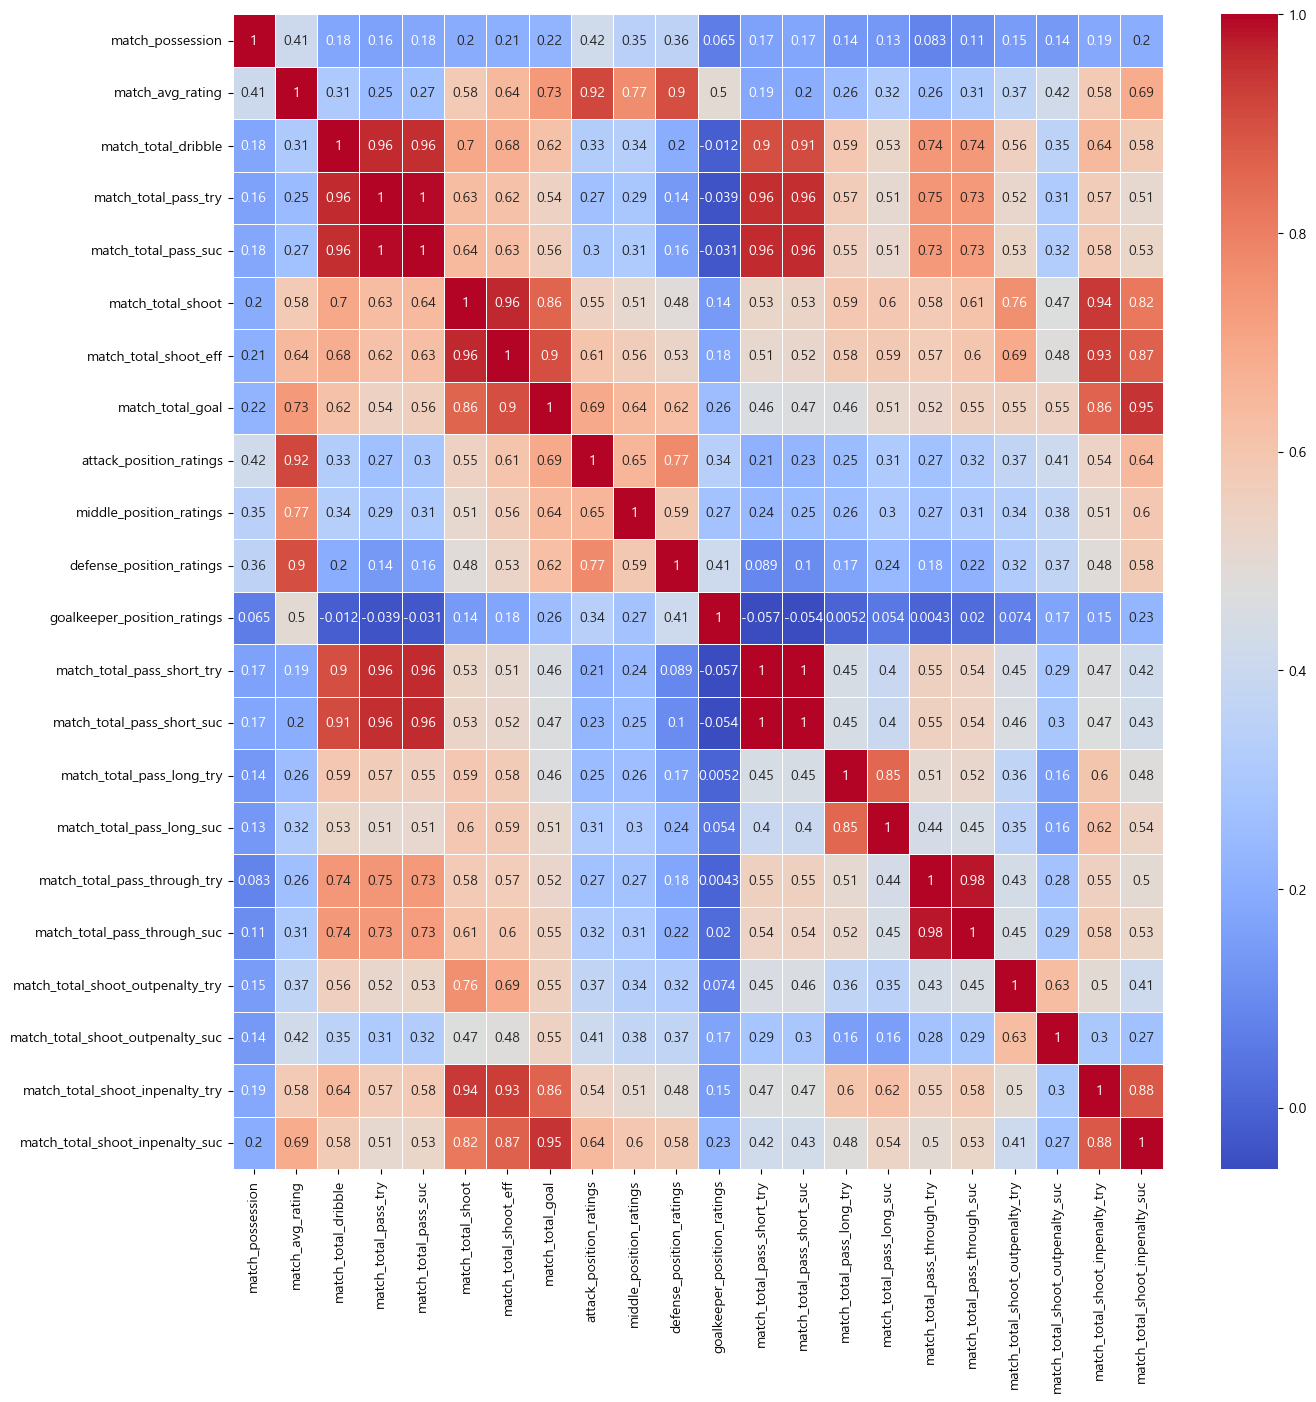

In [11]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df1_temp.corr(), annot = True, linewidths = .5, cmap = 'coolwarm')
plt.show()

In [12]:
threshold = 0.9
corr_matrix = df1_temp.corr()

strong_corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))    # 상삼각 행렬만 추출
    .stack()    # 데이터프레임으로 변환
    .reset_index()    # 인덱스를 리셋해 컬럼으로 변환
)
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Correlation'] > threshold]

# 결과 출력
print(strong_corr_pairs)

                       Variable 1                       Variable 2  \
27               match_avg_rating          attack_position_ratings   
29               match_avg_rating         defense_position_ratings   
41            match_total_dribble             match_total_pass_try   
42            match_total_dribble             match_total_pass_suc   
50            match_total_dribble       match_total_pass_short_try   
51            match_total_dribble       match_total_pass_short_suc   
60           match_total_pass_try             match_total_pass_suc   
68           match_total_pass_try       match_total_pass_short_try   
69           match_total_pass_try       match_total_pass_short_suc   
85           match_total_pass_suc       match_total_pass_short_try   
86           match_total_pass_suc       match_total_pass_short_suc   
95              match_total_shoot            match_total_shoot_eff   
109             match_total_shoot  match_total_shoot_inpenalty_try   
111         match_to

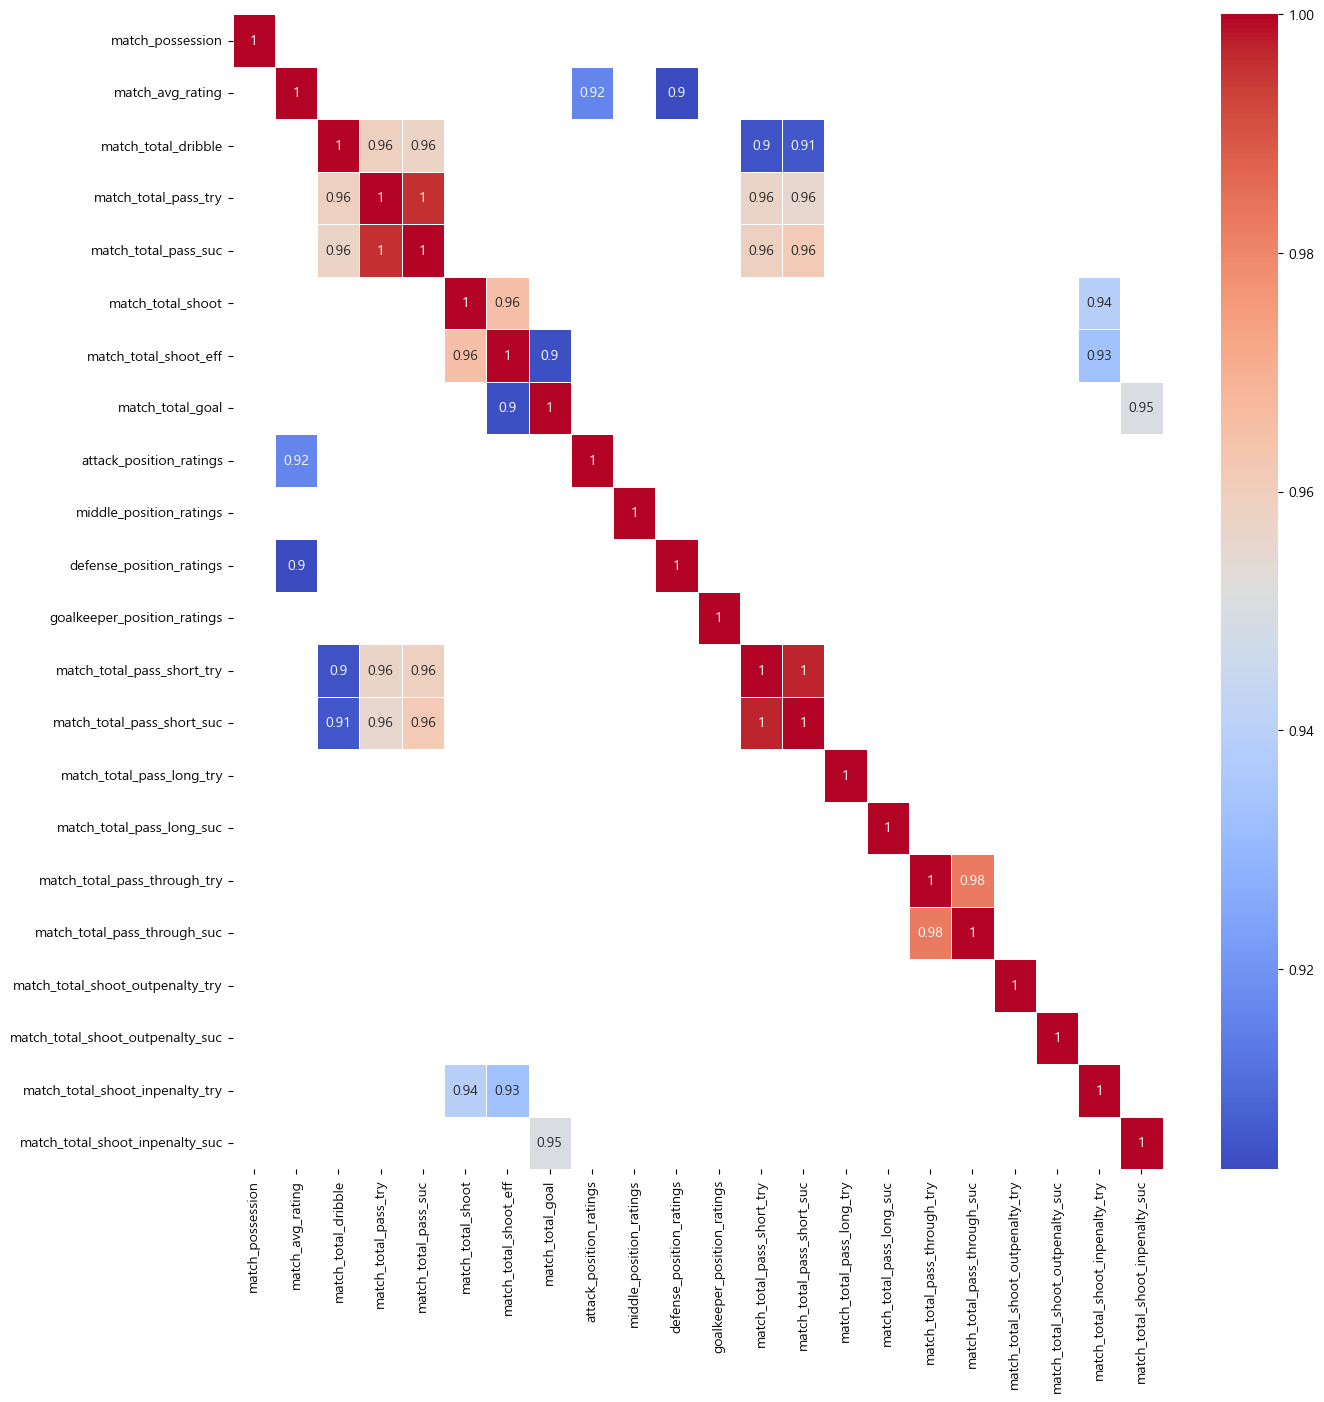

In [13]:
mask = np.abs(corr_matrix) <= threshold  

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, mask = mask, annot = True, linewidths = 0.5, cmap = 'coolwarm', ax = ax)
plt.show()

### 변수 제거 후 상관계수 및 VIF 확인

In [14]:
df2_temp = df1_temp.drop(columns = ['match_avg_rating', 
                          'match_total_dribble', 'match_total_pass_try', 'match_total_pass_suc',
                          'match_total_shoot', 'match_total_shoot_eff', 
                          'match_total_pass_short_suc', 'match_total_pass_through_suc', 'match_total_pass_long_suc', 
                          'match_total_shoot_outpenalty_suc', 'match_total_shoot_inpenalty_suc']
                           + position_ratings_col)

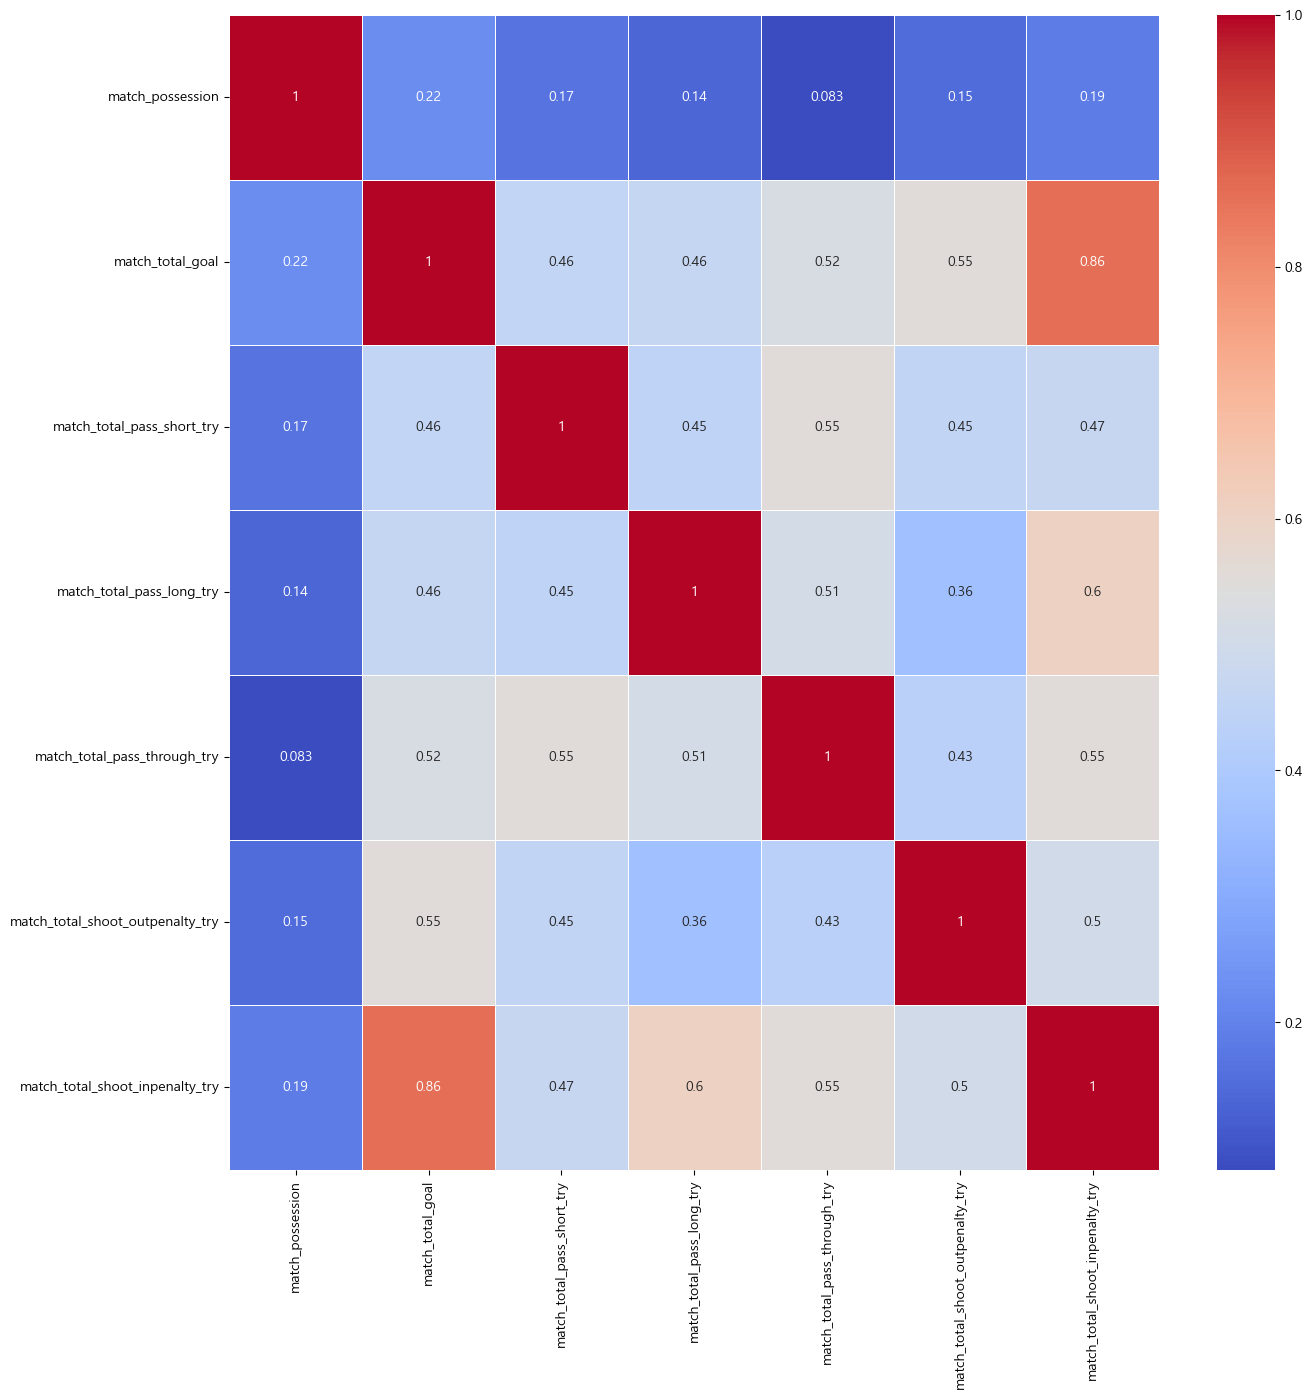

In [15]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df2_temp.corr(), annot = True, linewidths = .5, cmap = 'coolwarm')
plt.show()

In [16]:
threshold = 0.7
corr_matrix = df2_temp.corr()
strong_corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))    # 상삼각 행렬만 추출
    .stack()    # 데이터프레임으로 변환
    .reset_index()    # 인덱스를 리셋해 컬럼으로 변환
)
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Correlation'] > threshold]

# 결과 출력
print(strong_corr_pairs)

          Variable 1                       Variable 2  Correlation
10  match_total_goal  match_total_shoot_inpenalty_try     0.860056


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산 함수
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif

# VIF 계산 및 확인
vif_data = calculate_vif(df2_temp)
vif_data

,Variable,VIF
0,match_possession,2.251161
1,match_total_goal,5.980447
2,match_total_pass_short_try,3.461789
3,match_total_pass_long_try,2.686268
4,match_total_pass_through_try,3.301846
5,match_total_shoot_outpenalty_try,2.018198
6,match_total_shoot_inpenalty_try,6.762767


---

---

In [18]:
df3 = df1.copy()

df_win_query = "SELECT * FROM match_user WHERE match_result = '승'"
df3_win = pd.read_sql(df_win_query, con = engine)

df_lose_query = "SELECT * FROM match_user WHERE match_result = '패'"
df3_lose = pd.read_sql(df_lose_query, con = engine)

2024-12-01 00:30:12,000 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-12-01 00:30:12,002 INFO sqlalchemy.engine.Engine DESCRIBE `side_proj_fco`.`SELECT * FROM match_user WHERE match_result = '승'`
2024-12-01 00:30:12,002 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-01 00:30:12,004 INFO sqlalchemy.engine.Engine SELECT * FROM match_user WHERE match_result = '승'
2024-12-01 00:30:12,005 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-01 00:30:12,040 INFO sqlalchemy.engine.Engine ROLLBACK
2024-12-01 00:30:12,042 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-12-01 00:30:12,043 INFO sqlalchemy.engine.Engine DESCRIBE `side_proj_fco`.`SELECT * FROM match_user WHERE match_result = '패'`
2024-12-01 00:30:12,043 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-01 00:30:12,046 INFO sqlalchemy.engine.Engine SELECT * FROM match_user WHERE match_result = '패'
2024-12-01 00:30:12,046 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-01 00:30:12,067 INFO sqlalchemy.engine.Engine ROL

In [19]:
df3_win

,match_id,user_ouid,user_nickname,match_result,match_possession,match_avg_rating,match_total_dribble,match_total_pass_try,match_total_pass_suc,match_total_shoot,...,match_total_pass_short_try,match_total_pass_short_suc,match_total_pass_long_try,match_total_pass_long_suc,match_total_pass_through_try,match_total_pass_through_suc,match_total_shoot_outpenalty_try,match_total_shoot_outpenalty_suc,match_total_shoot_inpenalty_try,match_total_shoot_inpenalty_suc
0,67418a50fcfb86525b068dc9,c5bd2d238afff4775b5e6bc5c928e31c,SaddIerS3,승,70,4.08333,19,19,17,4,...,12,12,1,0,6,5,2,1,2,0
1,67418a525b7f6b04d21d13d4,a49aaacc626c90bca37e175eb31ec288,A헤가오,승,59,4.17222,17,32,28,4,...,26,23,0,0,6,5,2,1,1,1
2,67418a58060e19029147892c,0db87e3296072311b38a1c19fc243939,LanderSSG,승,53,4.14444,23,32,29,1,...,24,23,2,0,6,6,0,0,1,1
3,67418a5b49725df11f881dad,48d376ea55efee991a7155369a1fa951,호날두lol,승,48,4.45556,32,44,44,7,...,40,40,1,1,2,2,3,1,4,2
4,67418a6ac076266384b39cb0,25773019db5c3fb18d2f71ecfd353a4c,LA애플,승,54,4.10556,17,20,16,1,...,12,12,4,1,4,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,674afd99f429aba2aae6ecbe,ddea5a1b29f886f72b479d7b0ef0bf5d,남호찡,승,44,4.51111,9,9,8,3,...,5,5,0,0,4,3,0,0,3,2
798,674afdba562478fdbb4b2016,e972e3a61cce6c43b3080b3e013dffde,손밍국,승,88,3.91111,9,9,9,1,...,4,4,2,2,3,3,0,0,1,0
799,674afdbf8e3406412d3e54df,3f10a7eb8b9b187345f4dc3462fe5f3d,100억하나만,승,10,3.84444,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
800,674afdc4275c0dce61201e15,ab4f611640420ca0e918d8a7315f563b,cycycycy,승,71,3.98333,8,9,9,2,...,7,7,0,0,2,2,0,0,2,1


In [20]:
df3_lose

,match_id,user_ouid,user_nickname,match_result,match_possession,match_avg_rating,match_total_dribble,match_total_pass_try,match_total_pass_suc,match_total_shoot,...,match_total_pass_short_try,match_total_pass_short_suc,match_total_pass_long_try,match_total_pass_long_suc,match_total_pass_through_try,match_total_pass_through_suc,match_total_shoot_outpenalty_try,match_total_shoot_outpenalty_suc,match_total_shoot_inpenalty_try,match_total_shoot_inpenalty_suc
0,67418a563909e504f56f8222,623d56892e95056759904c52507a366a,대북중1짱,패,47,3.76111,21,25,23,0,...,12,12,0,0,13,11,0,0,0,0
1,67418a5b49725df11f881dad,aa233a8979530bf9c68c70887af62fe5,헛똑똑이,패,52,3.23333,18,30,25,0,...,22,21,2,0,5,4,0,0,0,0
2,67418a5e50df1b077eba40ff,000b9119e3cc3c8889df346602ca0de8,후어유,패,17,4.10556,2,1,1,0,...,1,1,0,0,0,0,0,0,0,0
3,67418a6026241724d12a3e7e,382e7980d4c625c9d30e4be9cf50aecf,불멸의발주먹,패,43,3.47222,24,45,40,3,...,32,31,2,2,5,3,2,0,1,0
4,67418a64f9e8d30e30e3cc4a,dcd1aae1a87b11c630ba8cfa281c8352,락견,패,61,3.80000,21,28,27,4,...,23,22,1,1,4,4,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,674afd9bee60e5b4ced0a6f7,11c777f5090f77074a46c61d5c55b0ec,호암동호랭이,패,51,3.46111,3,2,2,0,...,2,2,0,0,0,0,0,0,0,0
703,674afdb14d1ca992fe750f2e,59e642ec047130e7650314a0e985e5d0,폭탄강아지,패,55,3.65000,2,3,1,0,...,1,0,2,1,0,0,0,0,0,0
704,674afdba562478fdbb4b2016,3e530fba7cbabe196b60d1b054280e4f,천하무패무2018적,패,7,3.86111,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705,674afdc4275c0dce61201e15,81c6acd9f7d584a948bee59d599c873e,피데스,패,29,3.43889,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

---

In [23]:
def col_hist_all(df, col_name) : 
    fig, ax = plt.subplots(ncols = len(col_name), 
                           figsize = (3.5 * len(col_name), 6))
                           
    if len(col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(col_name):
        bins = 15
        
        sns.histplot(df[col].values, color = 'green', kde = True, ax = ax[idx], 
                     bins = bins, alpha = 0.6)   
        
        ax[idx].set_title(col_name[idx])
        ax[idx].set_xlim(0, max(7, max(df[col])))

    plt.tight_layout()
    plt.show()

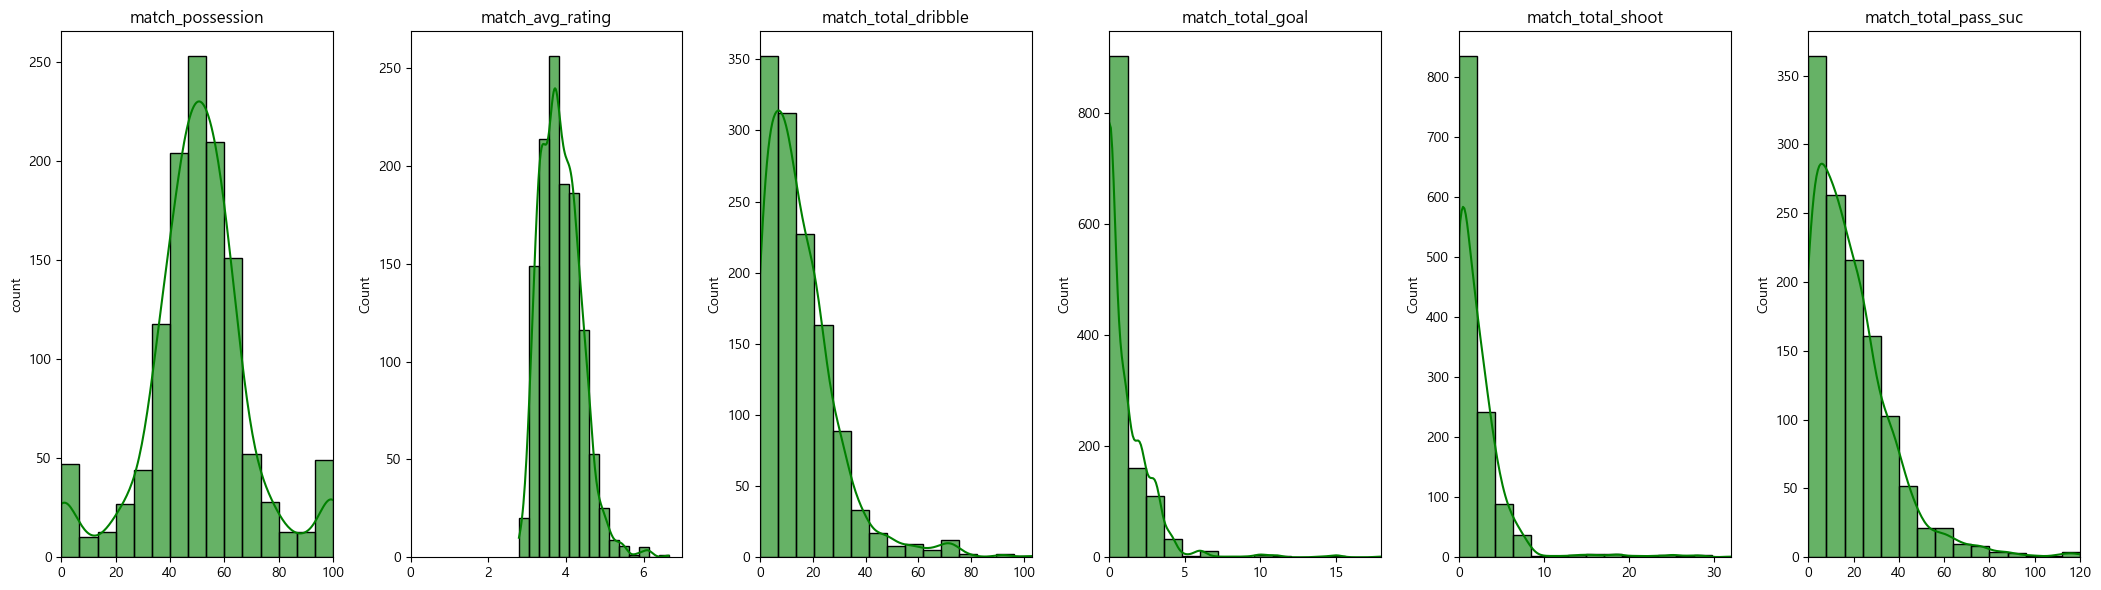

In [24]:
col_hist_all(df3, basic_col)

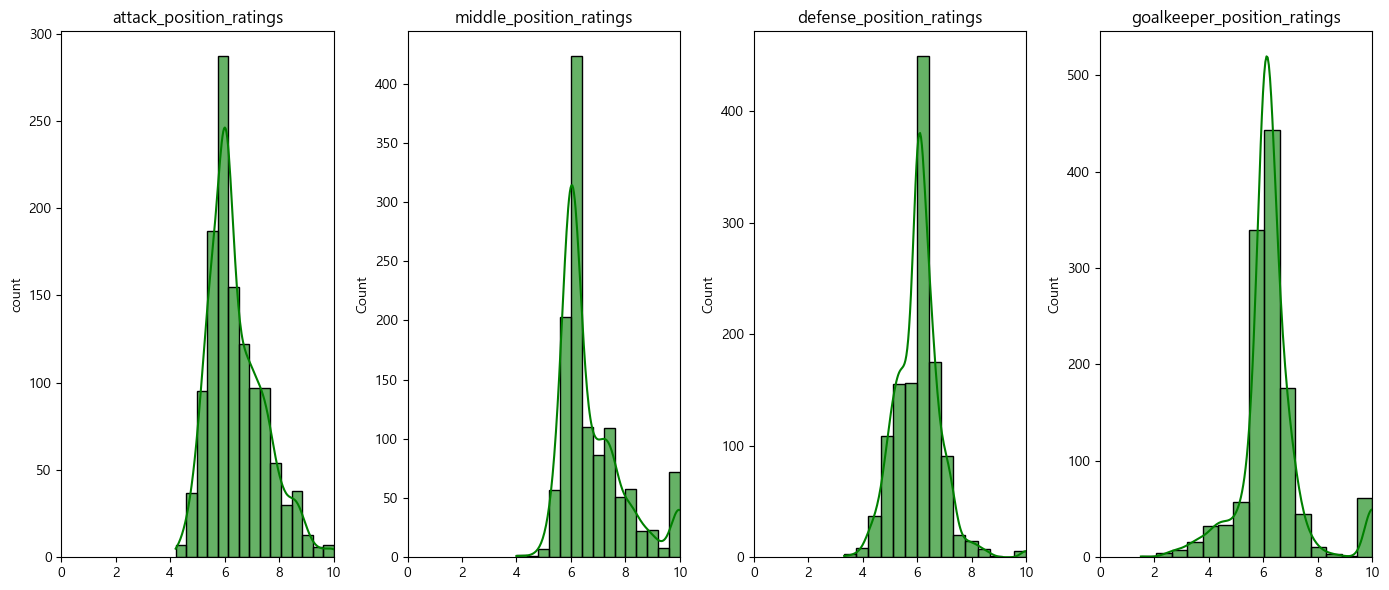

In [25]:
col_hist_all(df3, position_ratings_col)

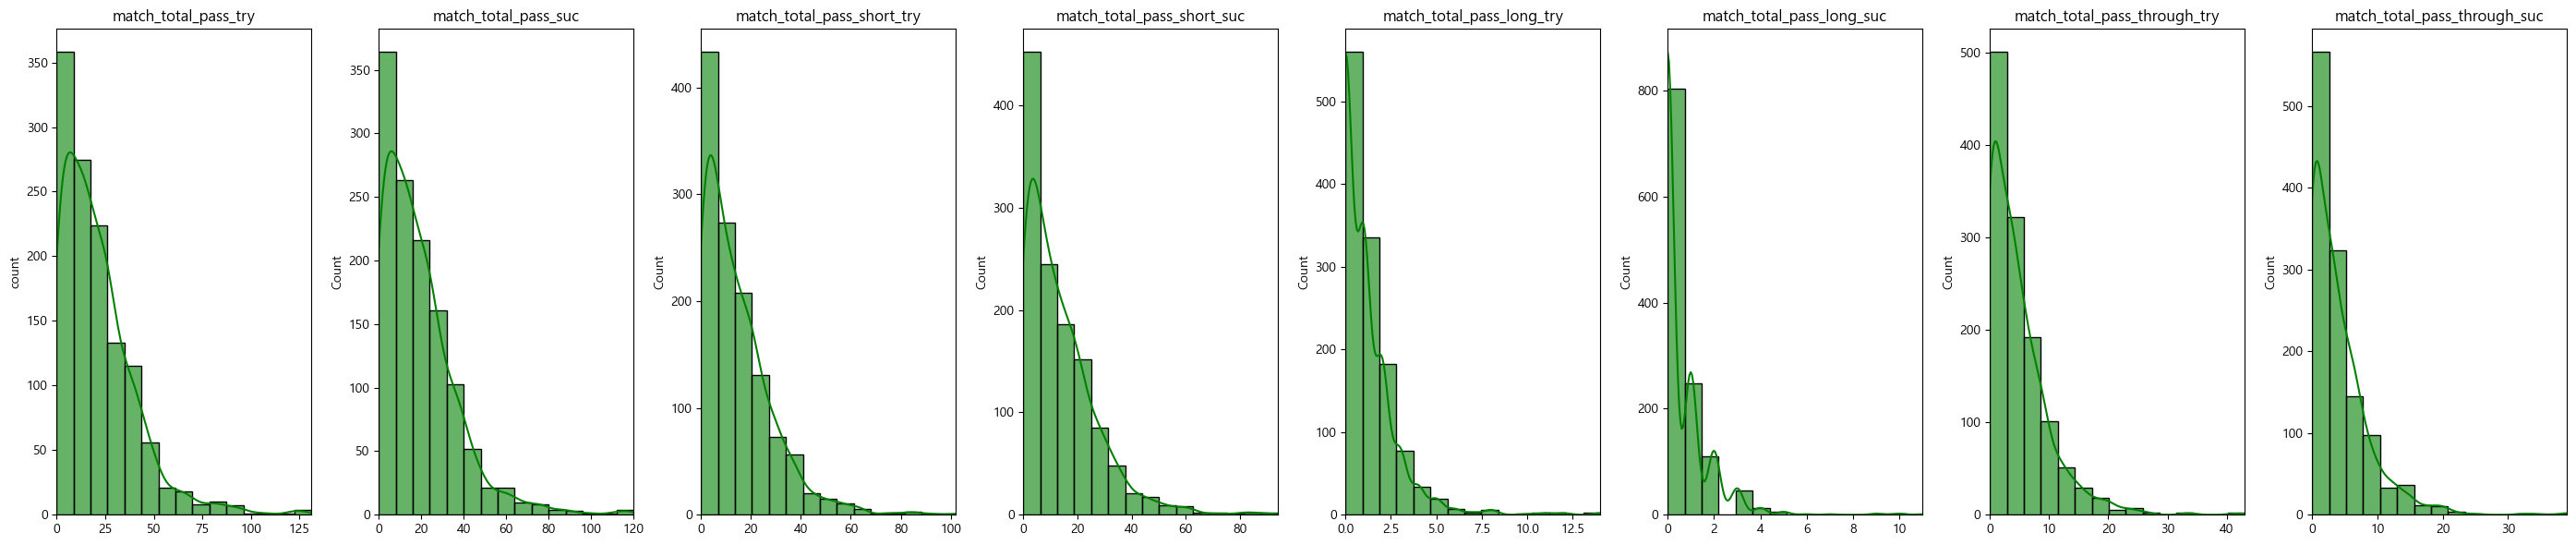

In [26]:
col_hist_all(df3, pass_col)

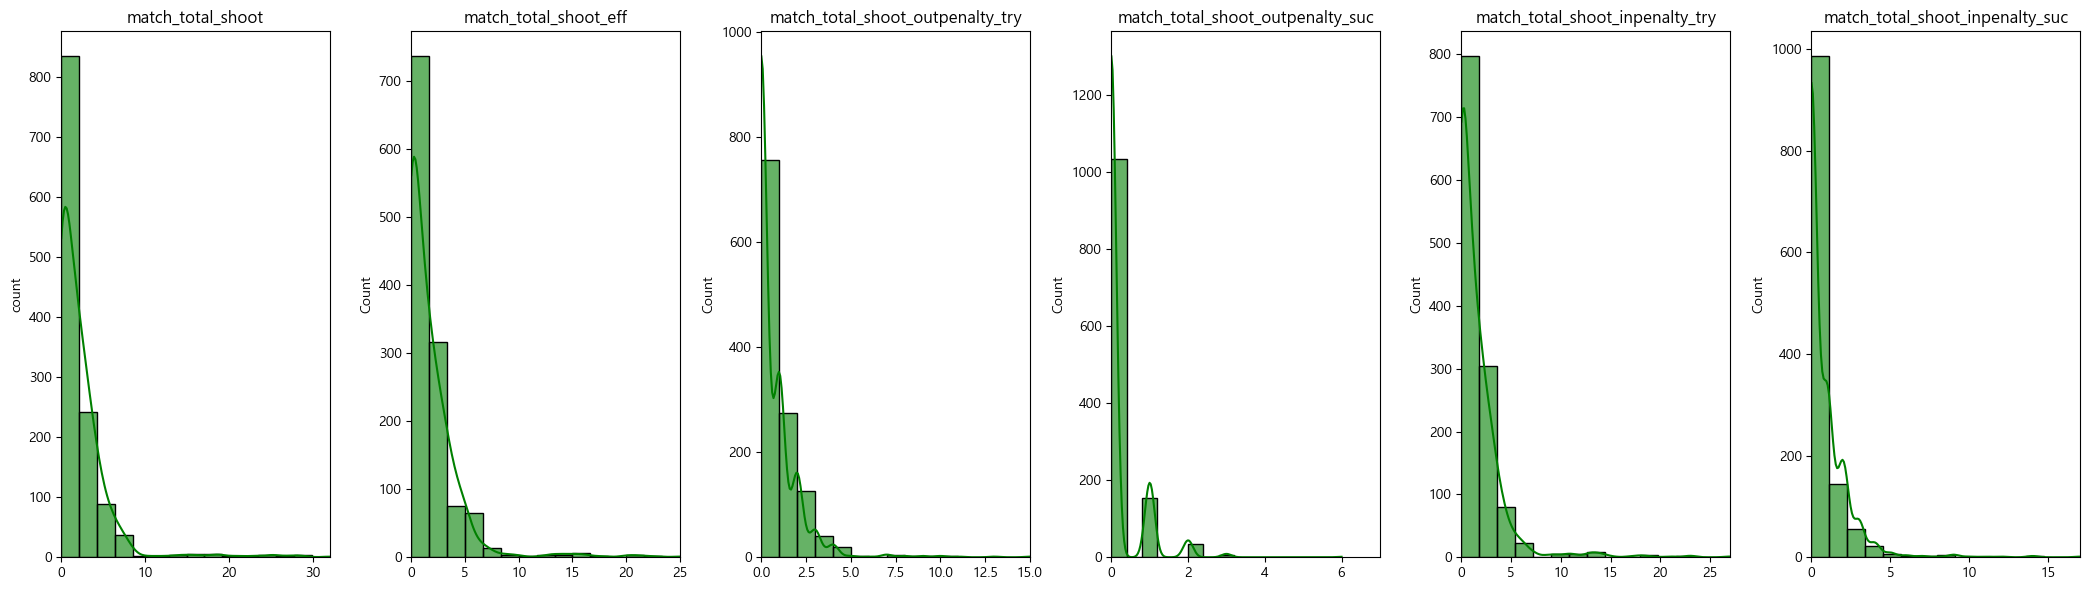

In [27]:
col_hist_all(df3, shoot_col)

---

## 경기 결과에 따른 Stat별 HIST

In [28]:
def col_hist(df_win, df_lose, col_name, sharey_bool) : 
    fig, ax = plt.subplots(ncols = len(col_name), 
                           figsize = (3.5 * len(col_name), 6), 
                           sharey = sharey_bool)
    if len(col_name) == 1:
        ax = [ax]
        
    ax[0].set_ylabel('count')

    for idx, col in enumerate(col_name):
        min_val = 0
        max_val = max(df_win[col].max(), df_lose[col].max())
        
        bins = 15
        
        sns.histplot(df_win[col].values, color = 'blue', kde = True, ax = ax[idx], label = '승', 
                     bins = bins, alpha=0.6)
        sns.histplot(df_lose[col].values, color = 'red', kde = True, ax = ax[idx], label = '패', 
                     bins = bins, alpha=0.6)   
        
        ax[idx].set_title(col_name[idx])
        ax[idx].legend()
    
    plt.tight_layout()
    plt.show()

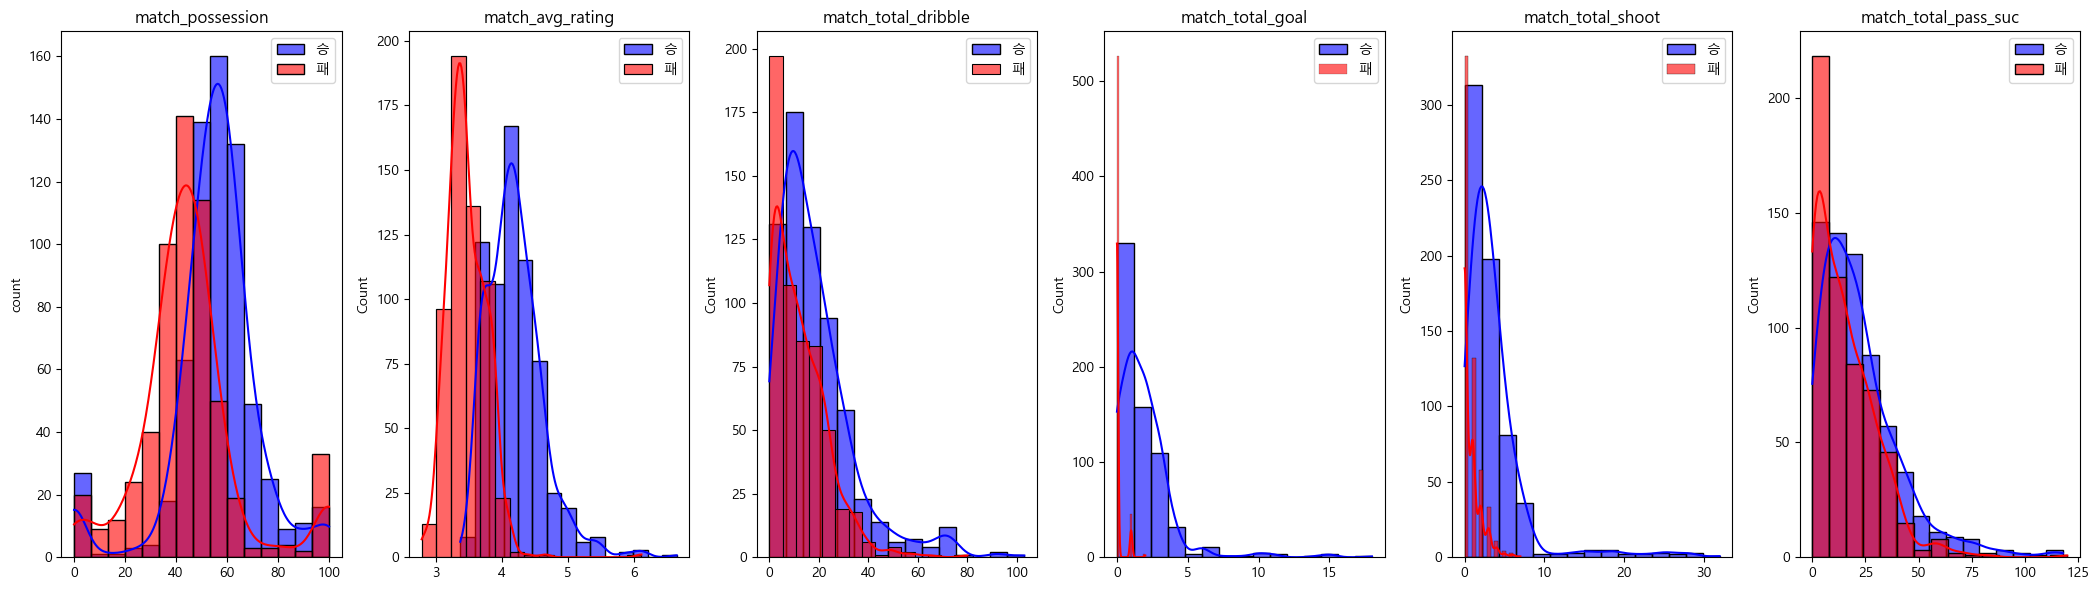

In [29]:
col_hist(df3_win, df3_lose, basic_col, False)

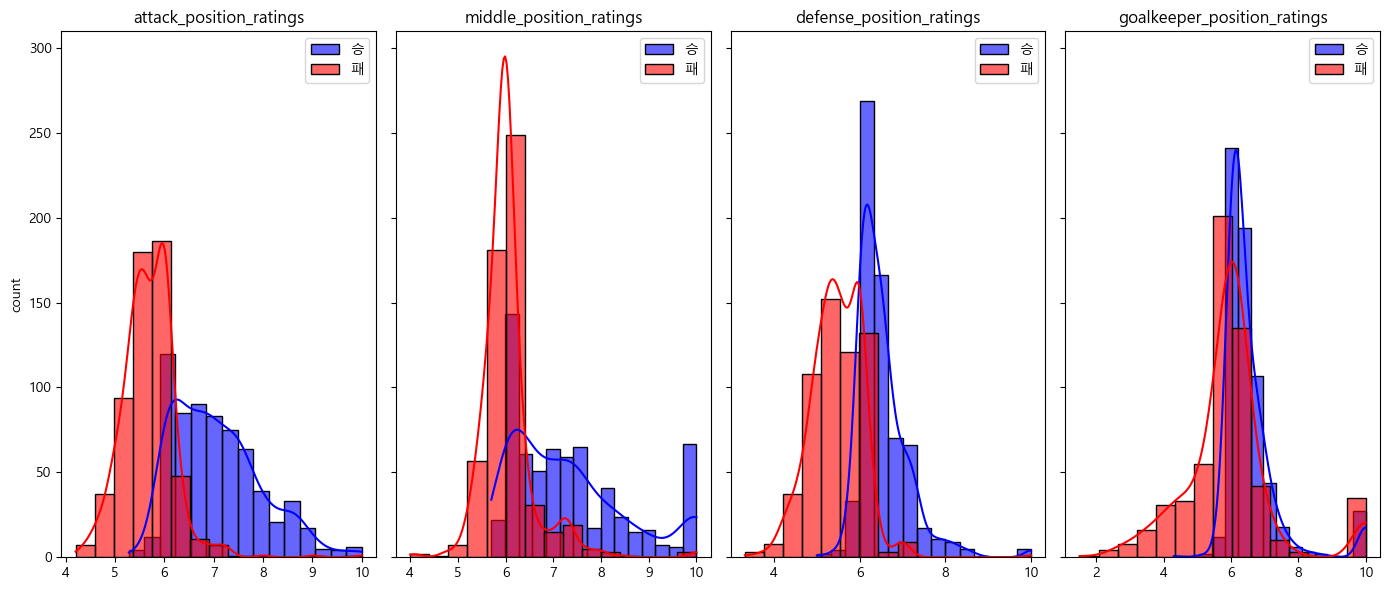

In [30]:
col_hist(df3_win, df3_lose, position_ratings_col, True)

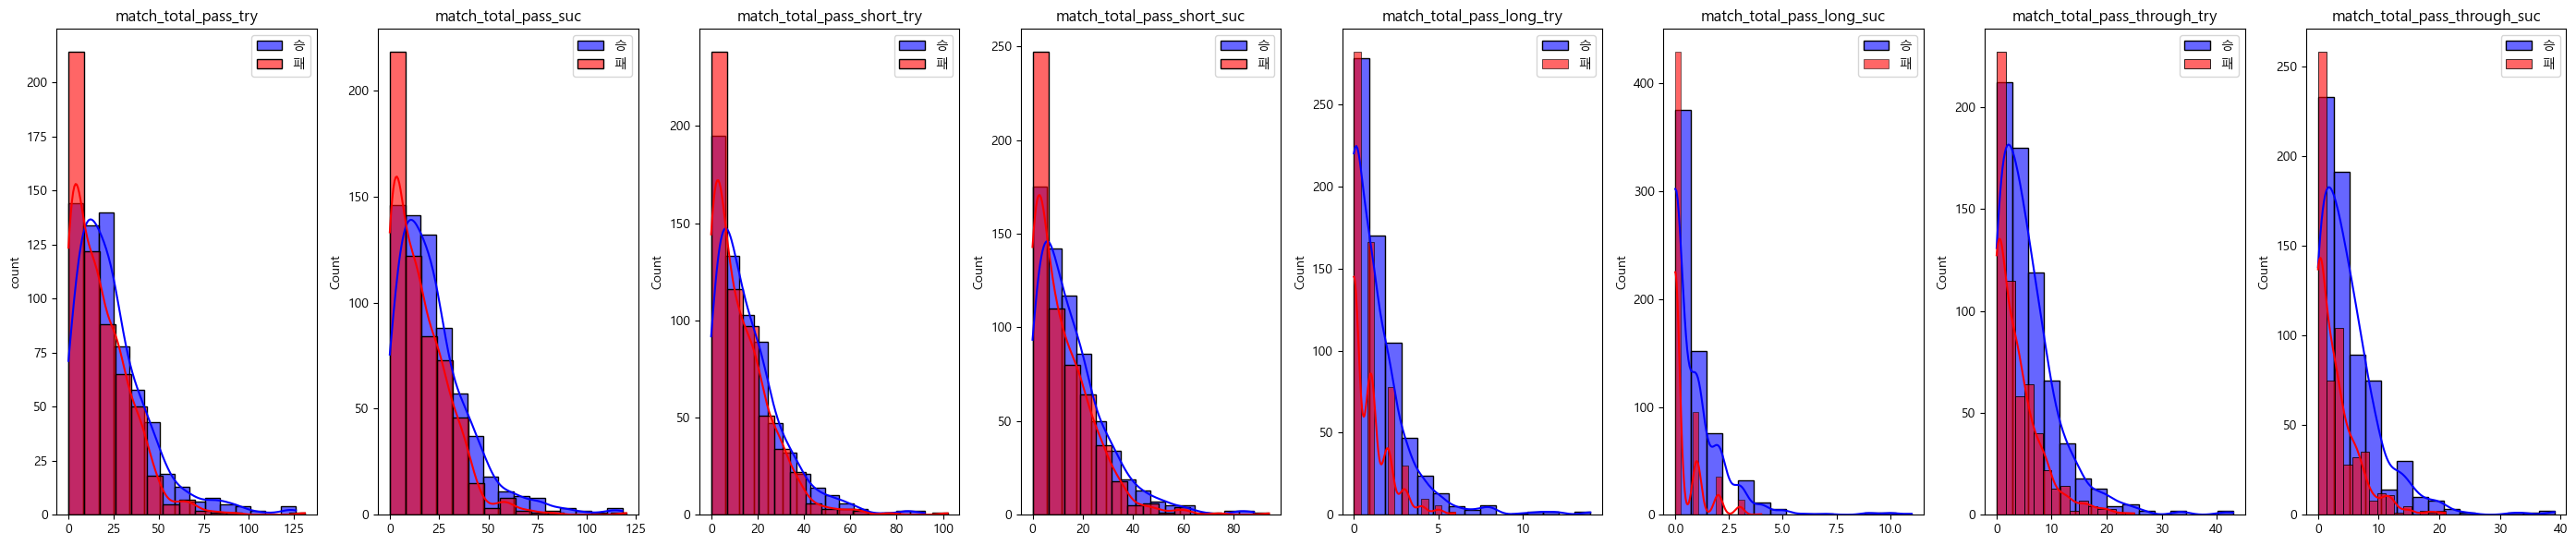

In [31]:
col_hist(df3_win, df3_lose, pass_col, False)

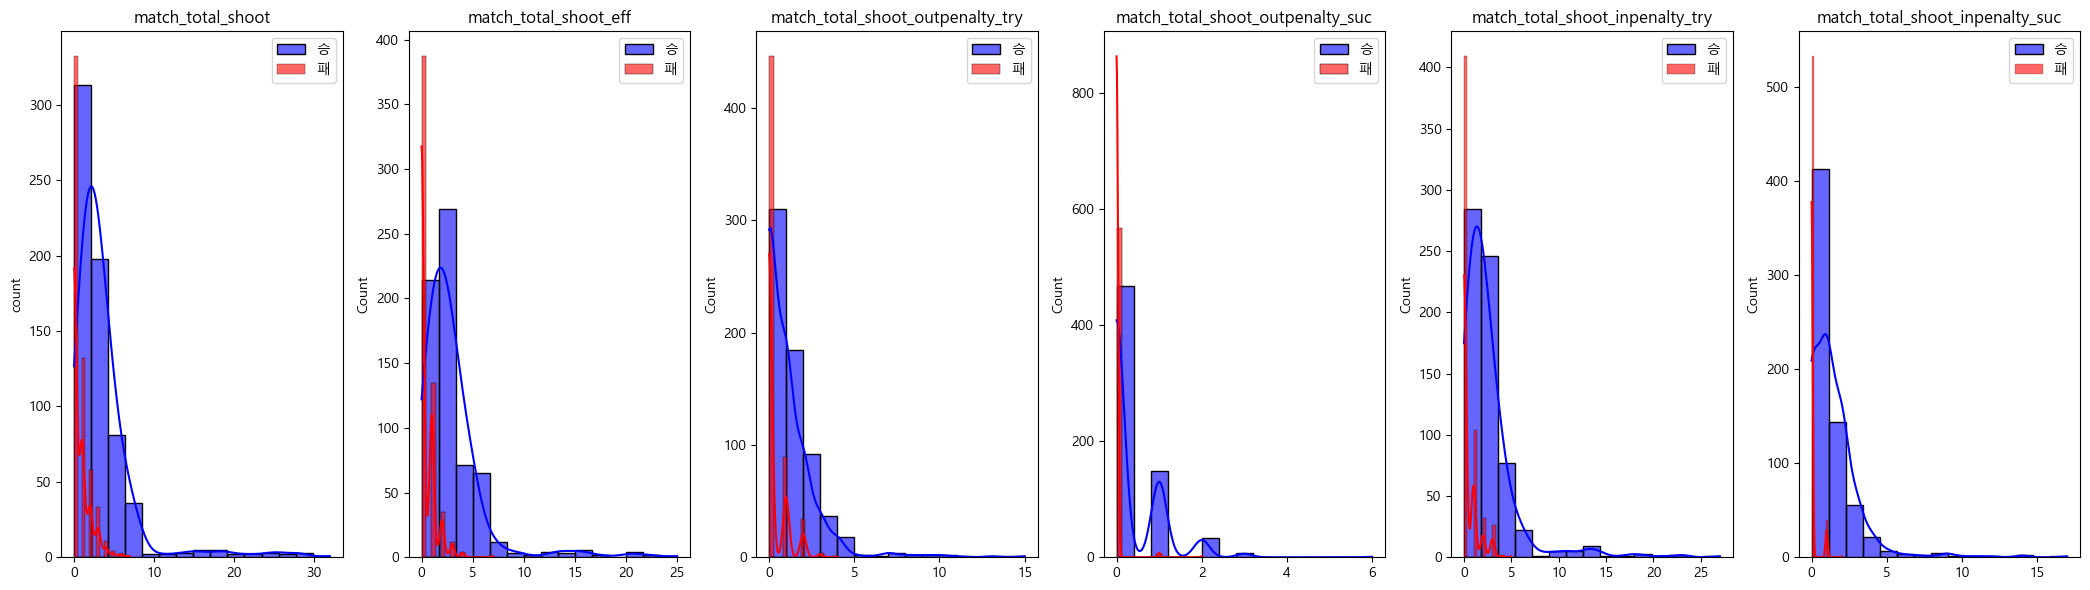

In [32]:
col_hist(df3_win, df3_lose, shoot_col, False)

## 경기 결과에 따른 Stat별  Box-Plot

In [33]:
def col_boxplot(df_win, df_lose, col_name, sharey_bool) : 

    title_list = ['승', '패']

    fig, ax = plt.subplots(ncols = len(col_name), 
                           figsize = (3.5 * len(col_name), 6), 
                           sharey = sharey_bool)
                           
    if len(col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(col_name):
        data_to_plot = [df_win[col].values, df_lose[col].values]
        ax[idx].boxplot(data_to_plot, tick_labels = title_list);  # labels로 직접 x축 라벨 지정

        ax[idx].set_xticks([i for i in range(1, len(title_list) + 1)])
        ax[idx].set_xticklabels(title_list)

        ax[idx].set_title(col_name[idx])

### 결과에 따른 Basic Stats

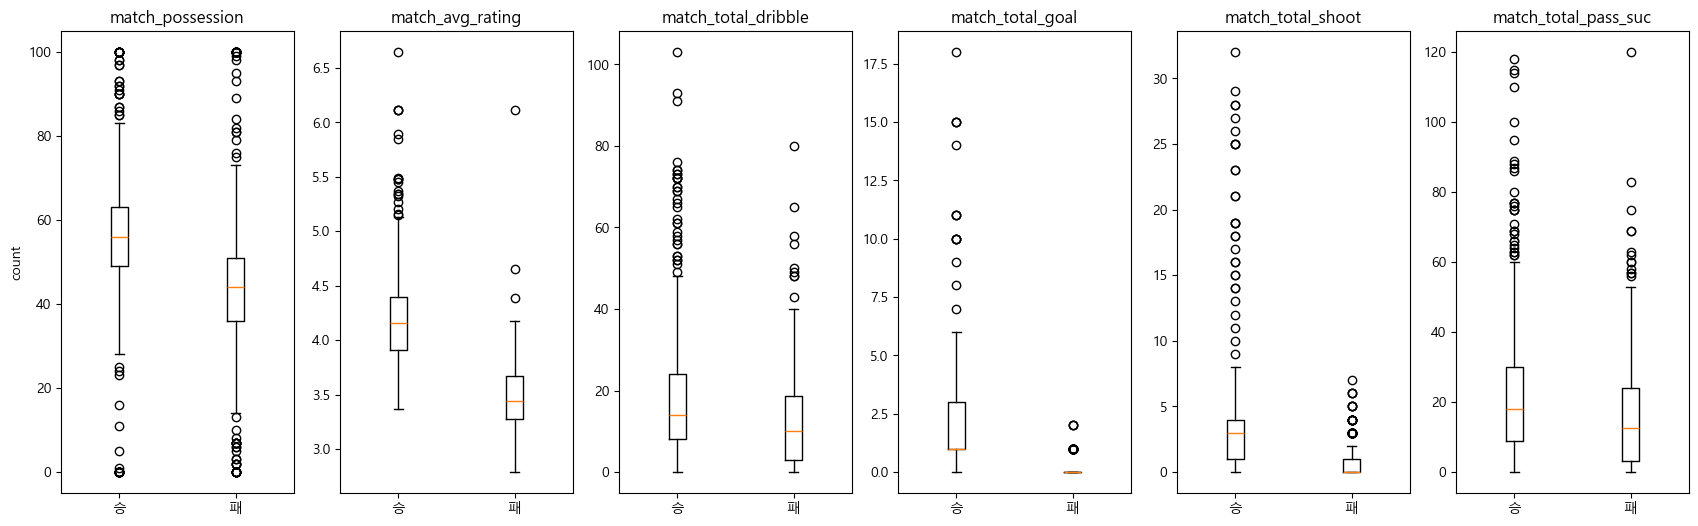

In [34]:
col_boxplot(df3_win, df3_lose, basic_col, False)

### 결과에 따른 Position 별 Ratings

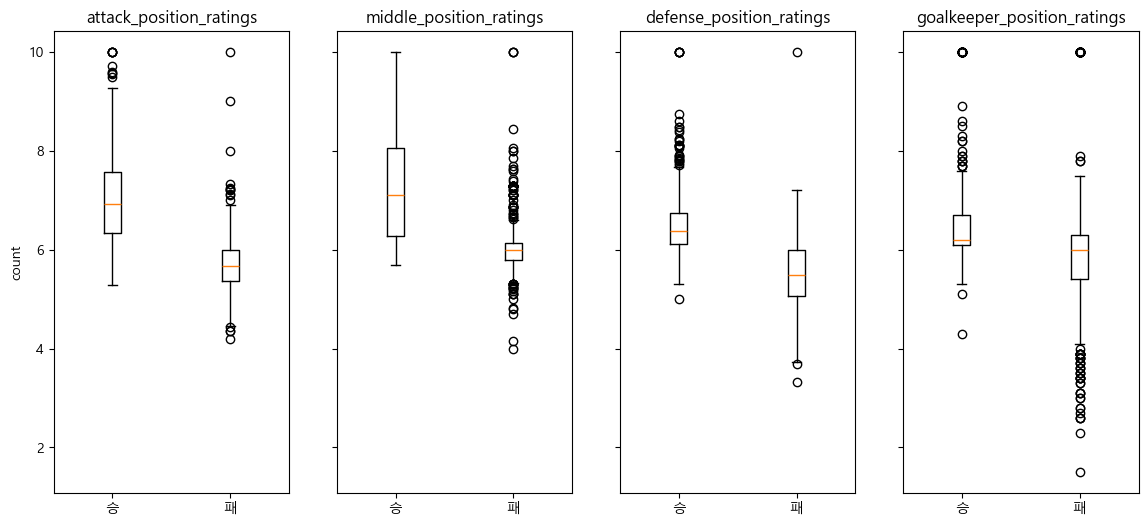

In [35]:
col_boxplot(df3_win, df3_lose, position_ratings_col, True)

### 경기 결과에 따른 Pass stats

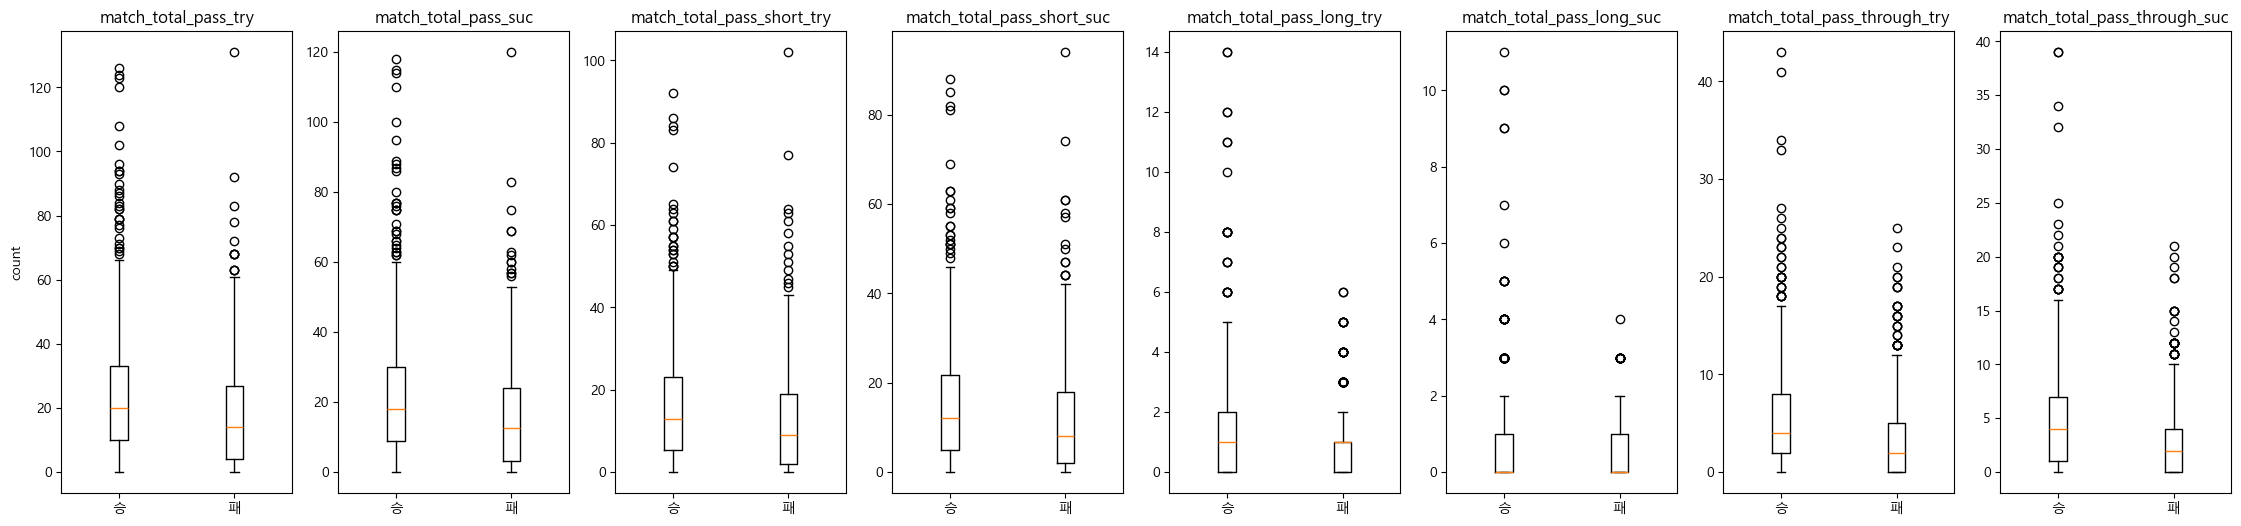

In [36]:
col_boxplot(df3_win, df3_lose, pass_col, False)

### 경기 결과에 따른 Shoot stats

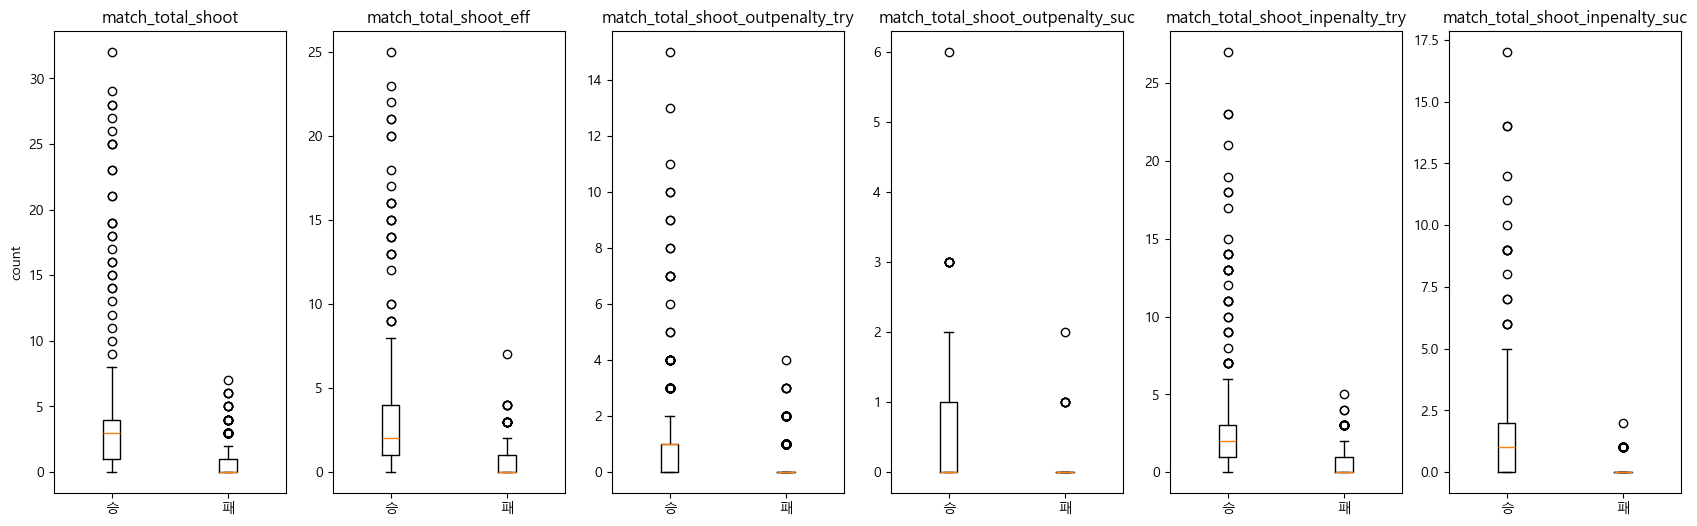

In [37]:
col_boxplot(df3_win, df3_lose, shoot_col, False)

In [38]:
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu, kstest, norm

In [39]:
# 1. 정규성 검정 (Shapiro-Wilk test)
def normality_test(df_win, df_lose, columns):
    columns_normality_O = []
    columns_normality_X = []
    
    columns_homogeneity_O = []
    columns_homogeneity_X = []

    for col in columns:
        stat_win_shap, p_val_win_shap = shapiro(df_win[col])
        stat_lose_shap, p_val_lose_shap = shapiro(df_lose[col])
        
        stat_win_kosm, p_val_win_kosm = kstest(df_win[col], 'norm', args=(df_win[col].mean(), df_win[col].std()))
        stat_lose_kosm, p_val_lose_kosm = kstest(df_lose[col], 'norm', args=(df_lose[col].mean(), df_lose[col].std()))
        
        stat, p_val = levene(df_win[col], df_lose[col])

#         print(f'{col} \n 승: p-value={p_val_win} \
#                       \n 패: p-value={p_val_lose} \
#                       \n Levene’s test p-value={p_val}')
              
        if p_val_win_shap > 0.05 and p_val_lose_shap > 0.05:
            columns_normality_O.append(col)  # 정규분포를 따르는 변수
        else:
            if p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05:
                columns_normality_O.append(col)  # 정규분포를 따르는 변수
            else:
                columns_normality_X.append(col)  # 정규분포를 따르지 않는 변수

        # 등분산성 검정 결과
        if p_val > 0.05:
            columns_homogeneity_O.append(col)  # 등분산성을 따르는 변수
        else:
            columns_homogeneity_X.append(col)  # 등분산성을 따르지 않는 변수

    # 결과 출력
    print('-----------------------------------------------------')
    print(f"정규분포 O: \n {', '.join(columns_normality_O)}")
    print('-----------------------------------------------------')
    print(f"정규분포 X: \n {', '.join(columns_normality_X)}")
    print('-----------------------------------------------------')
    print(f"등분산성 O: \n {', '.join(columns_homogeneity_O)}")
    print('-----------------------------------------------------')
    print(f"등분산성 X: \n {', '.join(columns_homogeneity_X)}")
    print('-----------------------------------------------------')

In [40]:
normality_test(df3_win, df3_lose, basic_col)

-----------------------------------------------------
정규분포 O: 
 
-----------------------------------------------------
정규분포 X: 
 match_possession, match_avg_rating, match_total_dribble, match_total_goal, match_total_shoot, match_total_pass_suc
-----------------------------------------------------
등분산성 O: 
 
-----------------------------------------------------
등분산성 X: 
 match_possession, match_avg_rating, match_total_dribble, match_total_goal, match_total_shoot, match_total_pass_suc
-----------------------------------------------------


In [41]:
normality_test(df3_win, df3_lose, position_ratings_col)

-----------------------------------------------------
정규분포 O: 
 
-----------------------------------------------------
정규분포 X: 
 attack_position_ratings, middle_position_ratings, defense_position_ratings, goalkeeper_position_ratings
-----------------------------------------------------
등분산성 O: 
 
-----------------------------------------------------
등분산성 X: 
 attack_position_ratings, middle_position_ratings, defense_position_ratings, goalkeeper_position_ratings
-----------------------------------------------------


In [42]:
normality_test(df3_win, df3_lose, pass_col)

-----------------------------------------------------
정규분포 O: 
 
-----------------------------------------------------
정규분포 X: 
 match_total_pass_try, match_total_pass_suc, match_total_pass_short_try, match_total_pass_short_suc, match_total_pass_long_try, match_total_pass_long_suc, match_total_pass_through_try, match_total_pass_through_suc
-----------------------------------------------------
등분산성 O: 
 match_total_pass_short_try
-----------------------------------------------------
등분산성 X: 
 match_total_pass_try, match_total_pass_suc, match_total_pass_short_suc, match_total_pass_long_try, match_total_pass_long_suc, match_total_pass_through_try, match_total_pass_through_suc
-----------------------------------------------------


In [43]:
normality_test(df3_win, df3_lose, shoot_col)

-----------------------------------------------------
정규분포 O: 
 
-----------------------------------------------------
정규분포 X: 
 match_total_shoot, match_total_shoot_eff, match_total_shoot_outpenalty_try, match_total_shoot_outpenalty_suc, match_total_shoot_inpenalty_try, match_total_shoot_inpenalty_suc
-----------------------------------------------------
등분산성 O: 
 
-----------------------------------------------------
등분산성 X: 
 match_total_shoot, match_total_shoot_eff, match_total_shoot_outpenalty_try, match_total_shoot_outpenalty_suc, match_total_shoot_inpenalty_try, match_total_shoot_inpenalty_suc
-----------------------------------------------------


In [44]:
def group_difference_test(df_win, df_lose, columns):
    for col in columns:
        # 정규성 여부에 따라 검정 방법 선택
        stat_win_shap, p_val_win_shap = shapiro(df_win[col])
        stat_lose_shap, p_val_lose_shap = shapiro(df_lose[col])
        
        stat_win_kosm, p_val_win_kosm = kstest(df_win[col], 'norm', args=(df_win[col].mean(), df_win[col].std()))
        stat_lose_kosm, p_val_lose_kosm = kstest(df_lose[col], 'norm', args=(df_lose[col].mean(), df_lose[col].std()))
        
        if (p_val_win_shap > 0.05 and p_val_lose_shap > 0.05) or (p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05):  # 정규분포를 따를 경우
            stat, p_val = ttest_ind(df_win[col], df_lose[col], equal_var=True)  # 등분산 가정
            test_type = "t-test"
            
        else:  # 정규분포를 따르지 않을 경우
            stat, p_val = mannwhitneyu(df_win[col], df_lose[col])
            test_type = "Mann-Whitney U test"
        
        print('-----------------------------------------------------')

        if p_val < 0.05:
            print(f'{col}은(는) 승패에 따라 유의미한 차이가 있음')
        else:
            print(f'{col}은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX')

In [45]:
group_difference_test(df3_win, df3_lose, basic_col)

-----------------------------------------------------
match_possession은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_avg_rating은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_dribble은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_goal은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_suc은(는) 승패에 따라 유의미한 차이가 있음


In [46]:
group_difference_test(df3_win, df3_lose, position_ratings_col)

-----------------------------------------------------
attack_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
middle_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
defense_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
goalkeeper_position_ratings은(는) 승패에 따라 유의미한 차이가 있음


In [47]:
group_difference_test(df3_win, df3_lose, shoot_col)

-----------------------------------------------------
match_total_shoot은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_eff은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_outpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_outpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음


In [48]:
group_difference_test(df3_win, df3_lose, pass_col)

-----------------------------------------------------
match_total_pass_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_short_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_short_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_long_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_long_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_through_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_through_suc은(는) 승패에 따라 유의미한 차이가 있음


---

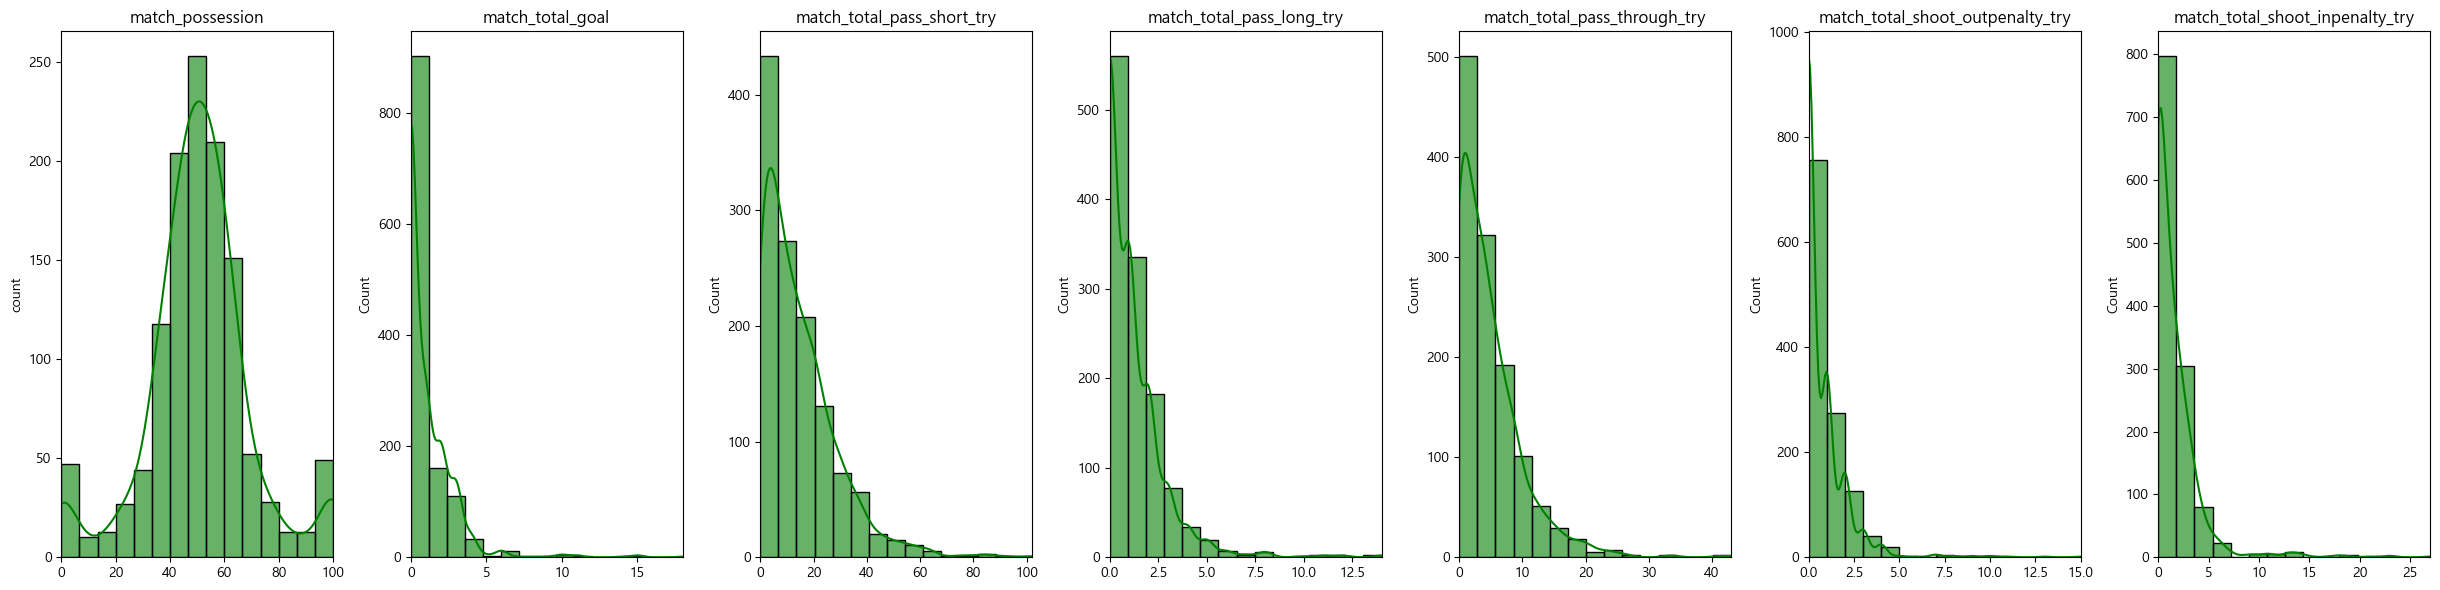

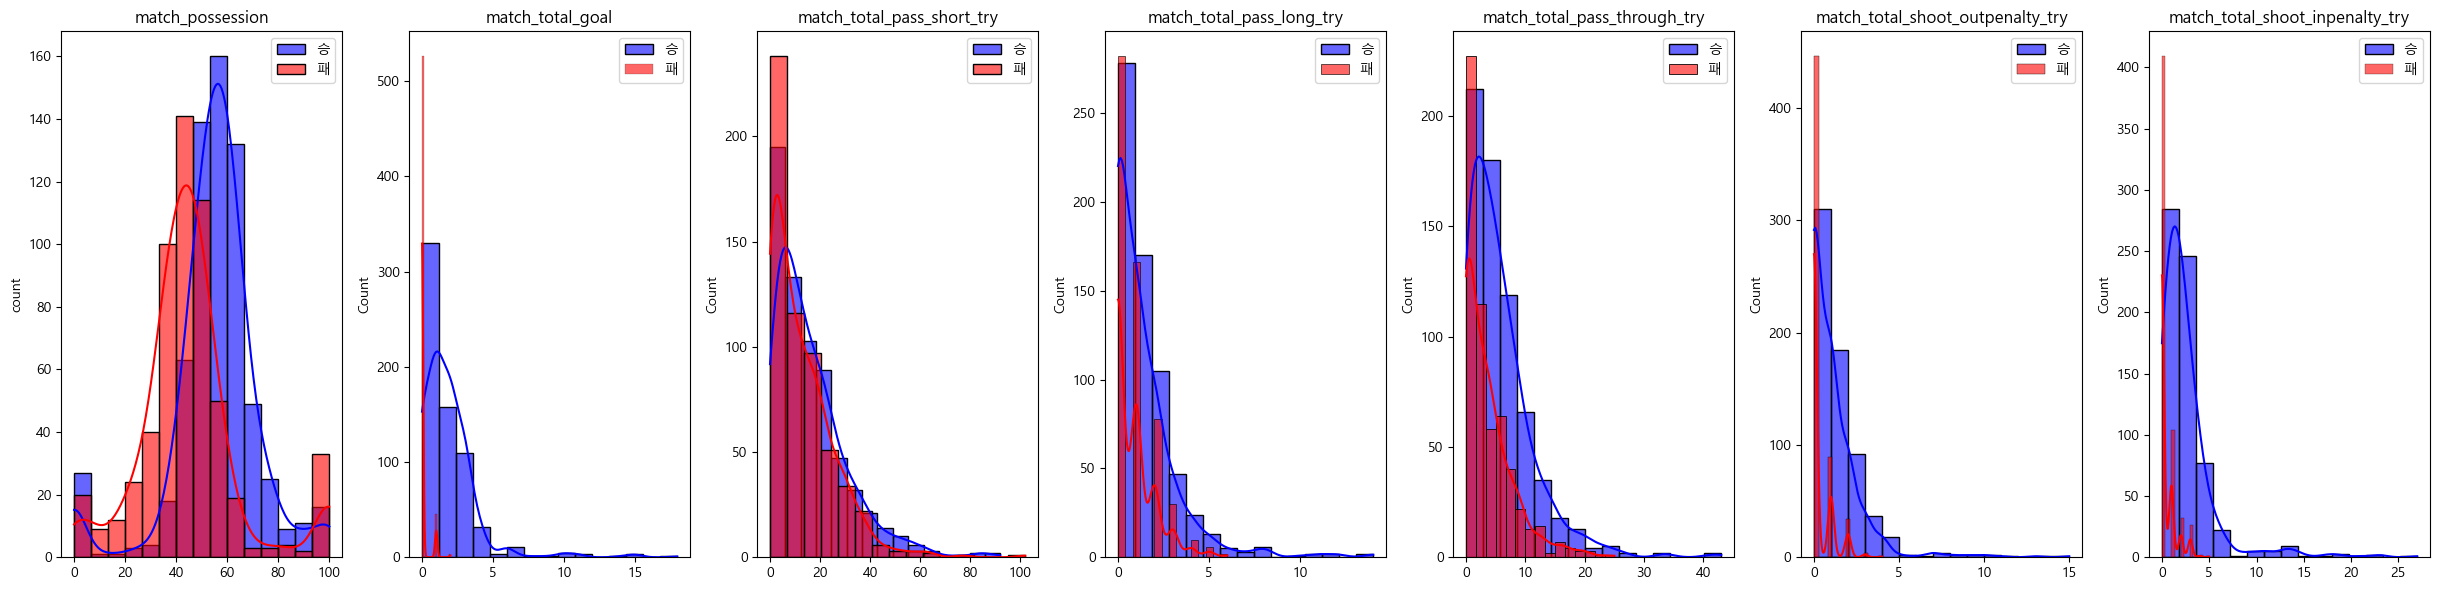

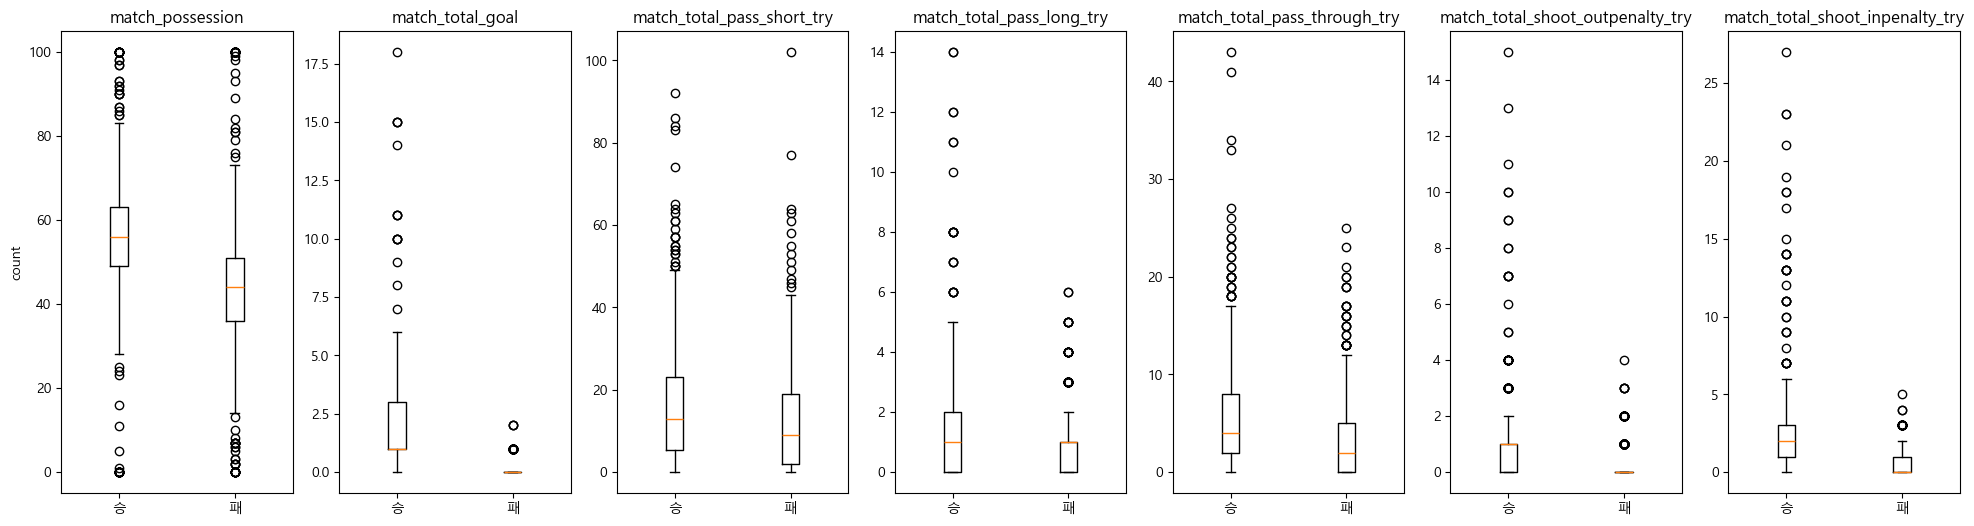

In [49]:
df4 = df1.drop(columns = ['match_id', 'user_ouid', 'user_nickname', 'match_avg_rating',
                          'match_total_dribble', 'match_total_pass_try', 'match_total_pass_suc',
                          'match_total_shoot', 'match_total_shoot_eff', 
                          'match_total_pass_short_suc', 'match_total_pass_through_suc', 'match_total_pass_long_suc', 
                          'match_total_shoot_outpenalty_suc', 'match_total_shoot_inpenalty_suc'] + position_ratings_col)

df4_win = df4[df4['match_result'] == '승']
df4_lose = df4[df4['match_result'] == '패']

df4_temp = df4.drop(columns = ['match_result'])

col_hist_all(df4_temp, df4_temp.columns);
col_hist(df4_win, df4_lose, df4_temp.columns, False);
col_boxplot(df4_win, df4_lose, df4_temp.columns, False);

In [50]:
normality_test(df4_win, df4_lose, df4_temp.columns)

-----------------------------------------------------
정규분포 O: 
 
-----------------------------------------------------
정규분포 X: 
 match_possession, match_total_goal, match_total_pass_short_try, match_total_pass_long_try, match_total_pass_through_try, match_total_shoot_outpenalty_try, match_total_shoot_inpenalty_try
-----------------------------------------------------
등분산성 O: 
 match_total_pass_short_try
-----------------------------------------------------
등분산성 X: 
 match_possession, match_total_goal, match_total_pass_long_try, match_total_pass_through_try, match_total_shoot_outpenalty_try, match_total_shoot_inpenalty_try
-----------------------------------------------------


In [51]:
group_difference_test(df4_win, df4_lose, df4_temp.columns)

-----------------------------------------------------
match_possession은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_goal은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_short_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_long_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_through_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_outpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_try은(는) 승패에 따라 유의미한 차이가 있음


In [52]:
df4

,match_result,match_possession,match_total_goal,match_total_pass_short_try,match_total_pass_long_try,match_total_pass_through_try,match_total_shoot_outpenalty_try,match_total_shoot_inpenalty_try
0,승,70,1,12,1,6,2,2
1,승,59,3,26,0,6,2,1
2,패,47,0,12,0,13,0,0
3,승,53,1,24,2,6,0,1
4,승,48,3,40,1,2,3,4
...,...,...,...,...,...,...,...,...
1227,패,39,0,13,0,1,0,0
1228,패,46,0,11,1,4,1,0
1229,패,52,0,5,0,2,0,0
1230,패,55,0,5,0,1,0,0


---

# PRACTICE

---

In [53]:
# match_total_goal, match_possession, match_total_shoot_inpenalty_try, 
# match_total_pass_short_try, match_total_pass_long_try, match_total_pass_through_try
# match_total_shoot_outpenalty_try, match_total_shoot_inpenalty_try

column_name = 'match_total_shoot_inpenalty_try'

temp_query = f"SELECT match_result, {column_name} FROM match_user;"
df_temp = pd.read_sql(temp_query, con = engine);

df_temp[column_name] += 0.1
df_temp[f'{column_name}_boxcox'] = stats.boxcox(df_temp[column_name])[0] # box-cox 변환

x = df_temp[column_name]
x_win = df_temp[df_temp['match_result'] == '승'][column_name]
x_lose = df_temp[df_temp['match_result'] == '패'][column_name]

y = df_temp[f'{column_name}_boxcox'] # box-cox 변환
y_win = df_temp[df_temp['match_result'] == '승'][f'{column_name}_boxcox'] # box-cox 변환
y_lose = df_temp[df_temp['match_result'] == '패'][f'{column_name}_boxcox'] # box-cox 변환

2024-11-29 23:48:30,273 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-29 23:48:30,273 INFO sqlalchemy.engine.Engine DESCRIBE `side_proj_fco`.`SELECT match_result, match_total_shoot_inpenalty_try FROM match_user;`
2024-11-29 23:48:30,274 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-11-29 23:48:30,275 INFO sqlalchemy.engine.Engine SELECT match_result, match_total_shoot_inpenalty_try FROM match_user;
2024-11-29 23:48:30,276 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-11-29 23:48:30,285 INFO sqlalchemy.engine.Engine ROLLBACK


In [54]:
print(shapiro(x))
print(kstest(x, 'norm', args=(x.mean(), x.std())))

if shapiro(x).pvalue > 0.05 :
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _shap')

if kstest(x, 'norm', args=(x.mean(), x.std())).pvalue > 0.05 : 
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
print(shapiro(x_win))
print(kstest(x_win, 'norm', args=(x_win.mean(), x_win.std())))

if shapiro(x_win).pvalue > 0.05 :
    print(f'{column_name}_win 은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}_win 은(는) 정규분포를 따르지 않음, _shap')

if kstest(x_win, 'norm', args=(x_win.mean(), x_win.std())).pvalue > 0.05 : 
    print(f'{column_name}_win 은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}_win 은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
print(shapiro(x_lose))
print(kstest(x_lose, 'norm', args=(x_lose.mean(), x_lose.std())))

if shapiro(x_lose).pvalue > 0.05 :
    print(f'{column_name}_lose 은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}_lose 은(는) 정규분포를 따르지 않음, _shap')

if kstest(x_lose, 'norm', args=(x_lose.mean(), x_lose.std())).pvalue > 0.05 : 
    print(f'{column_name}_lose 은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}_lose 은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
stat_win_shap, p_val_win_shap = shapiro(y_win)
stat_lose_shap, p_val_lose_shap = shapiro(y_lose)

stat_win_kosm, p_val_win_kosm = kstest(y_win, 'norm', args=(y_win.mean(), y_win.std()))
stat_lose_kosm, p_val_lose_kosm = kstest(y_lose, 'norm', args=(y_lose.mean(), y_lose.std()))

stat, p_val = levene(y_win, y_lose)

print(f'{column_name} \n 승: p-value={p_val_win_shap, p_val_win_kosm} \
                \n 패: p-value={p_val_lose_shap, p_val_lose_kosm} \
                \n Levene’s test p-value={p_val}')

if p_val_win_shap > 0.05 and p_val_lose_shap > 0.05:
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _shap')

if p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05:
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _kosm')

if p_val > 0.05:
    print(f'{column_name}은(는) 등분산을 따른다고 볼 수 있음')
else:
    print(f'{column_name}은(는) 등분산을 따르지 않음')

if (p_val_win_shap > 0.05 and p_val_lose_shap > 0.05) or (p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05):  # 정규분포를 따를 경우
    stat, p_val = ttest_ind(y_win, y_lose, equal_var=True)  # 등분산 가정
    test_type = "t-test"
    
else:  # 정규분포를 따르지 않을 경우
    stat, p_val = mannwhitneyu(y_win, y_lose)
    test_type = "Mann-Whitney U test"

if p_val < 0.05:
    print(f'{column_name}은(는) 승패에 따라 유의미한 차이가 있음')
else:
    print(f'{column_name}은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX')

ShapiroResult(statistic=np.float64(0.5779553934091977), pvalue=np.float64(1.9378338382645987e-47))
KstestResult(statistic=np.float64(0.2731010501046881), pvalue=np.float64(1.1069117603119025e-81), statistic_location=np.float64(0.1), statistic_sign=np.int8(-1))
match_total_shoot_inpenalty_try은(는) 정규분포를 따르지 않음, _shap
match_total_shoot_inpenalty_try은(는) 정규분포를 따르지 않음, _kosm
----------------------------------------------------------
ShapiroResult(statistic=np.float64(0.6354720445946036), pvalue=np.float64(4.2426544324744375e-35))
KstestResult(statistic=np.float64(0.24083759031970298), pvalue=np.float64(4.468365315959653e-34), statistic_location=np.float64(3.1), statistic_sign=np.int8(1))
match_total_shoot_inpenalty_try_win 은(는) 정규분포를 따르지 않음, _shap
match_total_shoot_inpenalty_try_win 은(는) 정규분포를 따르지 않음, _kosm
----------------------------------------------------------
ShapiroResult(statistic=np.float64(0.5954644640882891), pvalue=np.float64(1.8714199213481048e-34))
KstestResult(statistic=np.fl

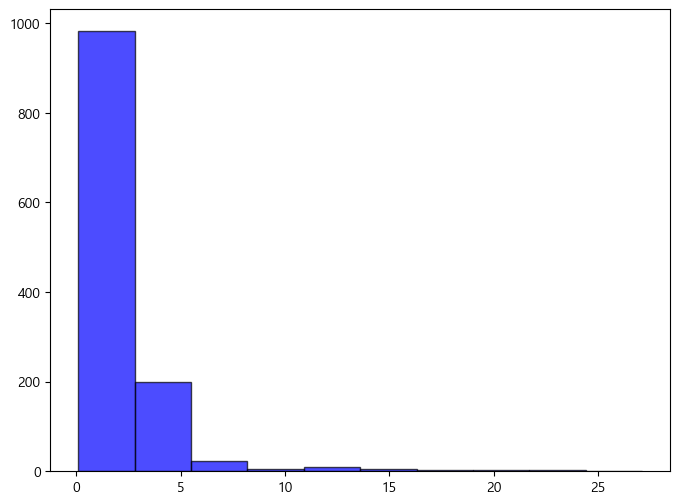

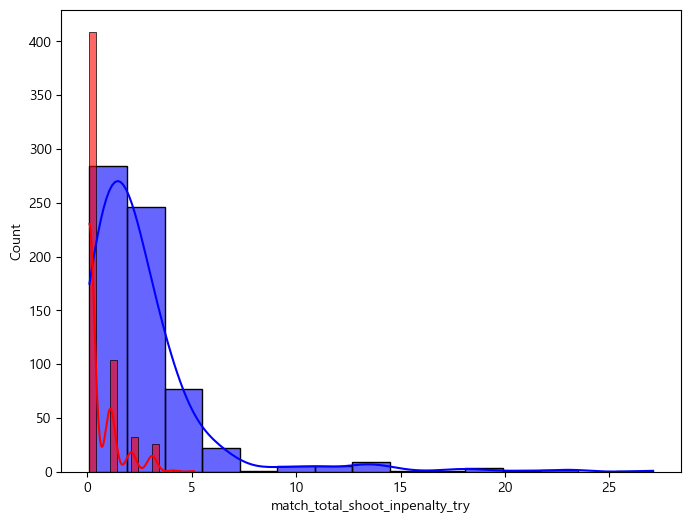

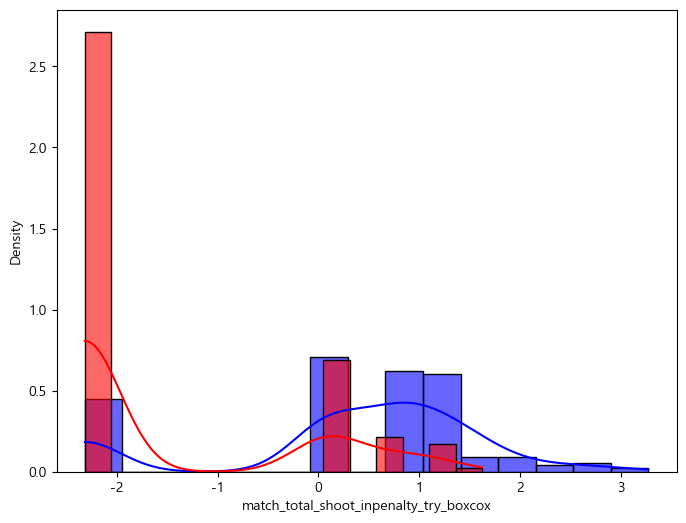

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))  # figsize는 여기서 설정

ax.hist(x, color='blue', alpha=0.7, edgecolor='black')

fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(x_win, color='blue', bins = 15, kde=True, ax=ax, label='승', alpha=0.6);
sns.histplot(x_lose, color='red', bins = 15, kde=True, ax=ax, label='패', alpha=0.6);

fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(y_win, color='blue', bins = 15, kde=True, ax=ax, label='승', stat="density", alpha=0.6);
sns.histplot(y_lose, color='red', bins = 15, kde=True, ax=ax, label='패', stat="density", alpha=0.6);